In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [12]:
# Load the dataset
data=pd.read_csv("House_Rent_Dataset.csv")
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
data.shape

(4746, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [15]:
data.sample(6)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1810,2022-07-02,4,130000,4800,11 out of 19,Carpet Area,whitefield,Bangalore,Semi-Furnished,Bachelors/Family,4,Contact Agent
2098,2022-05-21,2,20000,750,2 out of 3,Carpet Area,"Venkateshappa Layout-Kammanahalli, Kammanahalli",Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
344,2022-06-29,2,9500,550,Ground out of 1,Carpet Area,"Garia Station, Garia",Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4183,2022-06-10,3,25000,1000,1 out of 4,Carpet Area,OU Colony-Shaikpet,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
91,2022-06-27,2,12000,550,Ground out of 2,Carpet Area,Baghajatin,Kolkata,Semi-Furnished,Family,2,Contact Owner
1841,2022-06-06,2,17000,1100,1 out of 4,Carpet Area,Bannerghatta Main Road,Bangalore,Semi-Furnished,Bachelors,2,Contact Agent


In [16]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [17]:
data.describe(include='object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


In [18]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [19]:
data.duplicated().sum()

np.int64(0)

In [20]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [21]:
#draw the columns not required
#axis=1 means we are dropping columns
#axis=0 means we are dropping rows

data=data.drop(['Posted On','Floor','Area Locality'],axis=1)

In [22]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

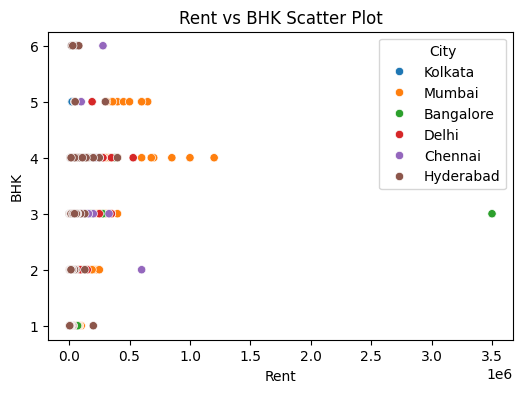

In [23]:
#scatter plot 

plt.figure(figsize=(6,4))
sns.scatterplot(x = "Rent",y = "BHK" , hue="City", data = data)
plt.title("Rent vs BHK Scatter Plot")
plt.show()

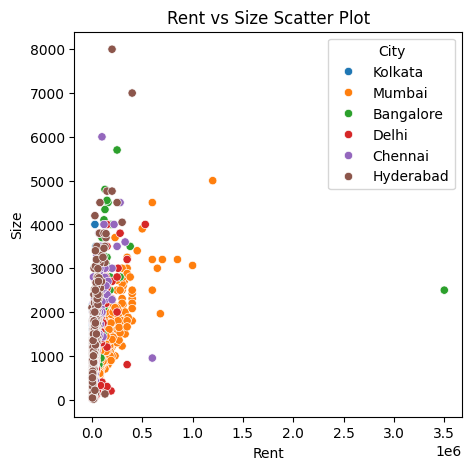

In [24]:
#scatter plot 

plt.figure(figsize=(5,5))
sns.scatterplot(x = "Rent",y = "Size" , hue="City", data = data)
plt.title("Rent vs Size Scatter Plot")
plt.show()

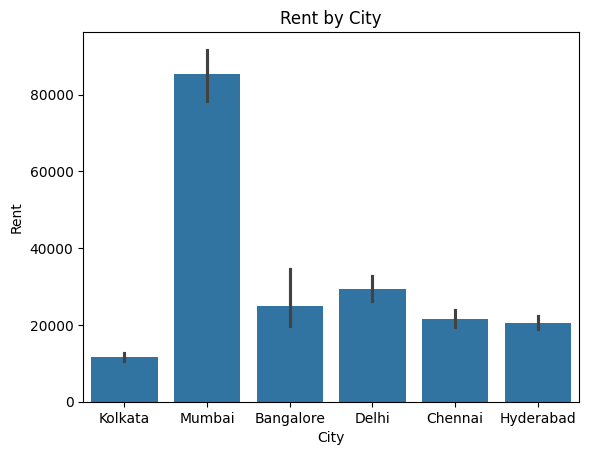

In [25]:
#rent by city

sns.barplot(x="City",y="Rent",data=data)
plt.title("Rent by City")
plt.show()

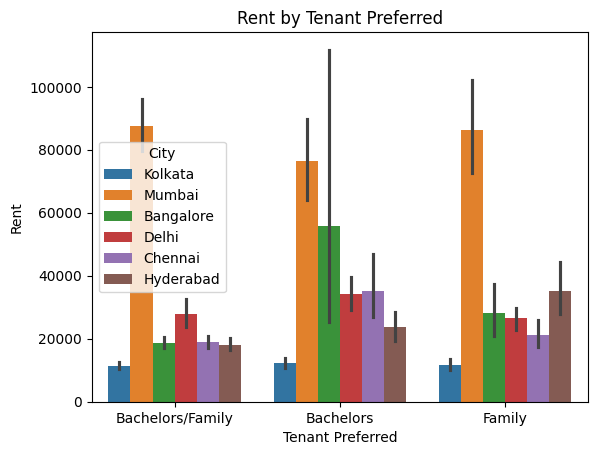

In [26]:
sns.barplot(x="Tenant Preferred",y="Rent",hue="City",data=data)
plt.title("Rent by Tenant Preferred")
plt.show()

#data processing and splitting

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [28]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols 

Index(['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Point of Contact'],
      dtype='object')

In [29]:
for col in categorical_cols:                   #in nunique it will display the number of unique values in that column (count)
    print(f"{col} : {data[col].nunique()}")     #in unique it will display the names 
   

Area Type : 3
City : 6
Furnishing Status : 3
Tenant Preferred : 3
Point of Contact : 3


In [30]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact'],
      dtype='object')

In [31]:
x = data.drop(columns="Rent")
y= data["Rent"]


In [32]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [33]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

In [34]:
#redcolour leaveonehotencoder

import category_encoders as ce
encoder= ce.LeaveOneOutEncoder(return_df=True)
x = encoder.fit_transform(x,y)

In [35]:
x.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,18676.943967,11648.319312,22468.505513,31216.953238,2,16706.291757
1,2,800,18672.853988,11629.198853,38727.130222,31214.048795,1,16703.181337
2,2,1000,18674.080982,11634.934990,38728.463556,31214.920128,1,16704.114463
3,2,800,18676.943967,11648.319312,22468.505513,31216.953238,1,16706.291757
4,2,850,52405.438398,11653.099426,22469.883682,42185.583836,1,16707.069362


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [37]:
x_df = pd.DataFrame(x)

In [38]:
x_df.head()

,0,1,2,3,4,5,6,7
0,-0.100773,0.208960,-0.968207,-0.899659,-1.096256,-0.584197,0.038594,-0.689511
1,-0.100773,-0.264125,-0.968450,-0.900396,0.326793,-0.584646,-1.092067,-0.689628
2,-0.100773,0.051265,-0.968377,-0.900175,0.326910,-0.584512,-1.092067,-0.689593
3,-0.100773,-0.264125,-0.968207,-0.899659,-1.096256,-0.584197,-1.092067,-0.689511
4,-0.100773,-0.185277,1.033212,-0.899475,-1.096135,1.112571,-1.092067,-0.689482


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
x_train.shape

(3796, 8)

In [41]:
x_test.shape

(950, 8)

In [42]:
x_test.shape , y_test.shape

((950, 8), (950,))

##training models  and evaluation of linear regression , random forest , decision tree

In [43]:
model_rfr = RandomForestRegressor()
model_dt = DecisionTreeRegressor()
model_lr = LinearRegression()
#model_xgb = XGBRegressor()

models = [model_rfr, model_dt, model_lr]


In [44]:
#fitting data in all three models

for model in models:
    print(f"Training {model}")
    model.fit(x_train, y_train)

Training RandomForestRegressor()
Training DecisionTreeRegressor()
Training LinearRegression()


In [45]:
for model in models:
    print(f"score of {model} is : {model.score(x_test, y_test)}")

score of RandomForestRegressor() is : 0.9338927702677747
score of DecisionTreeRegressor() is : 0.9362112750391519
score of LinearRegression() is : 0.515358651963779


In [46]:
new_data=pd.DataFrame(
{
    'BHK' : [3],
    'Size' : [1500],
    'Area Type':['Super Area'],
    'City':['Kolkata'], 
    'Furnishing Status':['Furnished'],
    'Tenant Preferred':['Family'],
    'Bathroom':[2],
    'Point of Contact':['Contact Owner']
}
)
new_data_encoder= encoder.transform((new_data))
new_data_scaled = scaler.transform(new_data_encoder)
predicted_rent = model_rfr.predict(new_data_scaled)
print(f"The predicted rent for the new data is: {predicted_rent[0]}")

The predicted rent for the new data is: 16530.0


#deployment

In [47]:
import pickle
# Save the trained model as a pickle file
pickle.dump(model_rfr, open('house_rent_model.pkl', 'wb'))

#save the encoder
pickle.dump(encoder, open('encoder.pkl', 'wb'))

#save the scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print("Model , Encoder and Scaler saved successfully")

Model , Encoder and Scaler saved successfully
